## Data and Model Exploration

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt


# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# load, understand, explore the dataset
houses = pd.read_json("street_group_data_science_bedrooms_test.json", lines=True)

In [3]:
houses

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms
0,Flats/Maisonettes,39.00,1,1,103000,126000,52.164661,-1.856154,0
1,Flats/Maisonettes,24.00,1,1,36000,44000,52.523281,-2.054445,0
2,Flats/Maisonettes,25.00,1,1,187000,229000,51.386343,-0.108323,0
3,Flats/Maisonettes,27.00,1,1,234000,350000,51.416946,-0.151787,2
4,Flats/Maisonettes,29.00,1,1,185000,277000,52.915728,-1.475258,1
...,...,...,...,...,...,...,...,...,...
999995,Detached,241.00,10,10,1480000,1800000,51.329410,-0.362611,3
999996,Detached,286.00,10,10,1630000,1800000,51.380529,-0.430064,5
999997,Semi-Detached,250.00,10,10,1240000,1510000,51.309676,-0.306065,4
999998,Semi-Detached,218.00,10,10,454000,682000,54.160256,-0.778915,4


In [4]:
houses.property_type.value_counts(normalize=True)

Terraced             0.333254
Semi-Detached        0.302967
Detached             0.224071
Flats/Maisonettes    0.139708
Name: property_type, dtype: float64

In [5]:
houses.bedrooms.value_counts().sort_index()

0      2725
1     57049
2    281689
3    449179
4    159928
5     38372
6      8427
7      1864
8       595
9       172
Name: bedrooms, dtype: int64

#### Check correlations between different features, if there is high collinearity between two features, it suggests that one of these features would be redundant

In [6]:
corr = houses.corr()

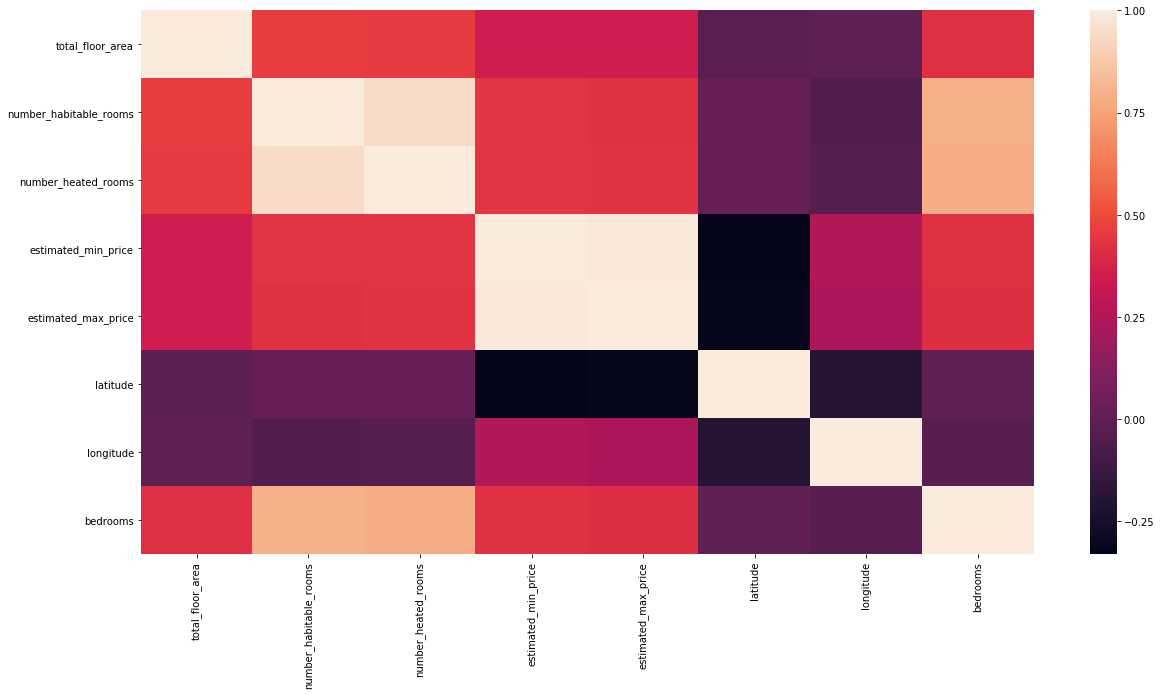

In [7]:
plt.figure(figsize=(20,10))

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values);

In [8]:
from sklearn import preprocessing

#### Apply Label encoding for the feature `property_type` to convert it into numerical category

In [9]:
le = preprocessing.LabelEncoder()
le.fit(houses.property_type)

LabelEncoder()

In [10]:
le.classes_

array(['Detached', 'Flats/Maisonettes', 'Semi-Detached', 'Terraced'],
      dtype=object)

In [11]:
houses['property_type'] = le.transform(houses['property_type'])

In [12]:
houses

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms
0,1,39.00,1,1,103000,126000,52.164661,-1.856154,0
1,1,24.00,1,1,36000,44000,52.523281,-2.054445,0
2,1,25.00,1,1,187000,229000,51.386343,-0.108323,0
3,1,27.00,1,1,234000,350000,51.416946,-0.151787,2
4,1,29.00,1,1,185000,277000,52.915728,-1.475258,1
...,...,...,...,...,...,...,...,...,...
999995,0,241.00,10,10,1480000,1800000,51.329410,-0.362611,3
999996,0,286.00,10,10,1630000,1800000,51.380529,-0.430064,5
999997,2,250.00,10,10,1240000,1510000,51.309676,-0.306065,4
999998,2,218.00,10,10,454000,682000,54.160256,-0.778915,4


In [13]:
# more exploration - following some intuition

houses['lat'] = np.radians(houses['latitude'])
houses['lon'] = np.radians(houses['longitude'])

In [14]:
houses

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,lat,lon
0,1,39.00,1,1,103000,126000,52.164661,-1.856154,0,0.910445,-0.032396
1,1,24.00,1,1,36000,44000,52.523281,-2.054445,0,0.916704,-0.035857
2,1,25.00,1,1,187000,229000,51.386343,-0.108323,0,0.896861,-0.001891
3,1,27.00,1,1,234000,350000,51.416946,-0.151787,2,0.897395,-0.002649
4,1,29.00,1,1,185000,277000,52.915728,-1.475258,1,0.923554,-0.025748
...,...,...,...,...,...,...,...,...,...,...,...
999995,0,241.00,10,10,1480000,1800000,51.329410,-0.362611,3,0.895867,-0.006329
999996,0,286.00,10,10,1630000,1800000,51.380529,-0.430064,5,0.896759,-0.007506
999997,2,250.00,10,10,1240000,1510000,51.309676,-0.306065,4,0.895523,-0.005342
999998,2,218.00,10,10,454000,682000,54.160256,-0.778915,4,0.945275,-0.013595


In [15]:
houses[['lat','lon']].to_numpy()

array([[ 0.91044509, -0.032396  ],
       [ 0.91670419, -0.03585683],
       [ 0.89686088, -0.00189059],
       ...,
       [ 0.89552278, -0.00534184],
       [ 0.94527479, -0.01359463],
       [ 0.94356575, -0.02311854]])

In [16]:
houses[houses['number_habitable_rooms']!=houses['number_heated_rooms']]

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,lat,lon
44,1,81.00,23,3,211000,258000,51.453772,-3.180729,2,0.898038,-0.055514
53,3,175.00,14,11,620000,758000,51.483922,-3.195866,4,0.898564,-0.055778
81,0,402.00,13,11,908000,1110000,51.049816,-0.900180,5,0.890987,-0.015711
84,3,69.00,1,0,232000,256000,52.440937,-1.805955,2,0.915267,-0.031520
86,3,49.00,31,3,276000,305000,51.143642,-0.973289,2,0.892625,-0.016987
...,...,...,...,...,...,...,...,...,...,...,...
999933,2,149.92,10,3,513000,627000,52.188684,0.173116,4,0.910864,0.003021
999934,0,113.00,10,7,699000,773000,52.171989,0.113057,5,0.910573,0.001973
999937,0,212.00,10,5,553000,676000,51.489251,0.117103,5,0.898657,0.002044
999944,0,250.00,10,9,1380000,1530000,51.022891,-1.337886,5,0.890517,-0.023351


In [17]:
import statsmodels.api as sm
from scipy import stats

In [18]:
X = houses.drop(['lat', 'lon', 'bedrooms'], axis=1)
y = houses['bedrooms']

#### I chose to explore the linear regression first since we have to predict number of rooms which is a continuous variable.

In [19]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                 2.330e+05
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:56:28   Log-Likelihood:            -8.7115e+05
No. Observations:             1000000   AIC:                         1.742e+06
Df Residuals:                  999991   BIC:                         1.742e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### From the heatmap it is evident that the features `number_habitable_rooms` & `number_heated_rooms` and `estimated_min_price` & `estimated_max_price` are highly correlated to each other. This explains the note which says there is an indication of strong multicollinearity

In [20]:
rms2 = sqrt(mean_squared_error(y, np.floor(est2.predict(X2))))
rms2

0.8313344693924342

#### I explored the p-values and the coefficients of each variable but looking at the p-values I thought if exploring stepwise regression would be useful since it chooses the most significant variables first.

In [21]:
est2.params.sort_values(ascending=False)

number_habitable_rooms    2.876408e-01
number_heated_rooms       1.469978e-01
latitude                  1.912300e-02
total_floor_area          5.951632e-04
estimated_min_price       1.447930e-06
estimated_max_price      -9.363713e-07
property_type            -1.197595e-03
longitude                -1.679923e-02
const                    -3.705043e-01
dtype: float64

#### I explored stepwise regression, but it did not prove to be helpful.

In [22]:
import statsmodels.formula.api as smf


def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [23]:
model = forward_selected(houses.drop(['lat', 'lon',
                                      'estimated_min_price', 'number_habitable_rooms'], axis=1), 'bedrooms')

In [24]:
print(model.model.formula)

bedrooms ~ number_heated_rooms + estimated_max_price + total_floor_area + longitude + latitude + property_type + 1


In [25]:
print(model.rsquared_adj)

0.6225252495461081


In [26]:
y

0         0
1         0
2         0
3         2
4         1
         ..
999995    3
999996    5
999997    4
999998    4
999999    5
Name: bedrooms, Length: 1000000, dtype: int64

### I explored Ridge and Lasso regression as well but the R2 score did not improve at all. It was also observed that normalising the data was not of much help.

In [27]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0, normalize=True)
clf.fit(X, y)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [28]:
clf.score(X, y)

0.6508221702345669

In [29]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.0)
clf.fit(X, y)

/Users/sammitranade/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sammitranade/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/sammitranade/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167171.9835364766, tolerance: 95.75177418844179
  positive)


Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
clf.score(X, y)

0.6508221702345667

#### Finally when I explored Polynomial regression with degrees 2 and 3, I chose the model with degree=2 since it proved to be robust than other models with the R2 score (`=0.692`) the highest among all the explored model and Root Mean Squared error (`=0.827`) the least.

In [31]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)
degree2 = poly.fit_transform(X)

In [32]:
poly4 = PolynomialFeatures(3)
degree3 = poly4.fit_transform(X)

poly3 = PolynomialFeatures(4)
degree4 = poly3.fit_transform(X)

In [33]:
degree2.shape

(1000000, 45)

In [34]:
X.shape

(1000000, 8)

In [35]:
X3 = sm.add_constant(degree2)
est3 = sm.OLS(y, X3)
est4 = est3.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 5.623e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:57:31   Log-Likelihood:            -8.0802e+05
No. Observations:             1000000   AIC:                         1.616e+06
Df Residuals:                  999959   BIC:                         1.617e+06
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.000     -9.545      0.0

In [36]:
est4.rsquared.round(3)

0.692

In [37]:
np.floor(est4.predict(X3))

array([0., 0., 0., ..., 5., 4., 5.])

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y, np.floor(est4.predict(X3))))
rms

0.8270852434906574

In [39]:
degree3.shape

(1000000, 165)

In [40]:
degree4.shape

(1000000, 495)

In [41]:
X5 = sm.add_constant(degree3)
est5 = sm.OLS(y, X5)
est6 = est5.fit()
print(est6.summary())

                            OLS Regression Results                            
Dep. Variable:               bedrooms   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 3.288e+04
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:58:14   Log-Likelihood:            -9.3012e+05
No. Observations:             1000000   AIC:                         1.860e+06
Df Residuals:                  999952   BIC:                         1.861e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.049e-07   1.77e-10  -1155.718      0.0

### Test Data Creation

In [42]:
houses2 = pd.read_json("street_group_data_science_bedrooms_test.json", lines=True)

In [43]:
del houses2['bedrooms']

In [44]:
houses2

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude
0,Flats/Maisonettes,39.00,1,1,103000,126000,52.164661,-1.856154
1,Flats/Maisonettes,24.00,1,1,36000,44000,52.523281,-2.054445
2,Flats/Maisonettes,25.00,1,1,187000,229000,51.386343,-0.108323
3,Flats/Maisonettes,27.00,1,1,234000,350000,51.416946,-0.151787
4,Flats/Maisonettes,29.00,1,1,185000,277000,52.915728,-1.475258
...,...,...,...,...,...,...,...,...
999995,Detached,241.00,10,10,1480000,1800000,51.329410,-0.362611
999996,Detached,286.00,10,10,1630000,1800000,51.380529,-0.430064
999997,Semi-Detached,250.00,10,10,1240000,1510000,51.309676,-0.306065
999998,Semi-Detached,218.00,10,10,454000,682000,54.160256,-0.778915


In [45]:
houses2.to_json('test_data.json')

In [46]:
pd.read_json("test_data.json")

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude
0,Flats/Maisonettes,39.00,1,1,103000,126000,52.164661,-1.856154
1,Flats/Maisonettes,24.00,1,1,36000,44000,52.523281,-2.054445
2,Flats/Maisonettes,25.00,1,1,187000,229000,51.386343,-0.108323
3,Flats/Maisonettes,27.00,1,1,234000,350000,51.416946,-0.151787
4,Flats/Maisonettes,29.00,1,1,185000,277000,52.915728,-1.475258
...,...,...,...,...,...,...,...,...
999995,Detached,241.00,10,10,1480000,1800000,51.329410,-0.362611
999996,Detached,286.00,10,10,1630000,1800000,51.380529,-0.430064
999997,Semi-Detached,250.00,10,10,1240000,1510000,51.309676,-0.306065
999998,Semi-Detached,218.00,10,10,454000,682000,54.160256,-0.778915
